In [41]:
import pandas as pd
import random
import itertools
import cv2
from matplotlib import pyplot as plt
import os
from scipy import stats
import numpy as np

In [2]:
path_photos = "../../Dataset/img_celeba/" 
celeb_identity = pd.read_csv("../../Dataset/identity_CelebA.txt", 
                             sep = " ", names=["image", "identity"])
celeb_identity["identity"] = celeb_identity["identity"].astype("string")
celeb_identity

,image,identity
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
202594,202595.jpg,9761
202595,202596.jpg,7192
202596,202597.jpg,9852
202597,202598.jpg,5570


In [3]:
celeb_attrs = pd.read_csv("../../Dataset/list_attr_celeba.txt", 
                             sep = "\s+")
celeb_attrs

,image,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [4]:
celeb_attrs_count = celeb_attrs.drop(columns=["image"]).apply(lambda x: x.value_counts())
celeb_attrs_count = celeb_attrs_count.transpose()
celeb_attrs_count

In [7]:
celeb_rowcount = celeb_identity.shape[0]
celeb_rowcount

202599

In [9]:
celeb_attrs_count["percentage"] = celeb_attrs_count[1].apply(lambda x: (x/celeb_rowcount)*100)
celeb_attrs_count

,-1,1,percentage
5_o_Clock_Shadow,180083,22516,11.113579
Arched_Eyebrows,148509,54090,26.698059
Attractive,98766,103833,51.250500
Bags_Under_Eyes,161153,41446,20.457159
Bald,198052,4547,2.244335
Bangs,171890,30709,15.157528
Big_Lips,153814,48785,24.079586
Big_Nose,155083,47516,23.453225
Black_Hair,154127,48472,23.925093
Blond_Hair,172616,29983,14.799185


In [10]:
celeb_attrs_count.describe()

,-1,1,percentage
count,40.000000,40.000000,40.000000
mean,156843.975000,45755.025000,22.584033
std,40412.035102,40412.035102,19.946809
min,33441.000000,4547.000000,2.244335
25%,143237.750000,13073.750000,6.453018
50%,168106.500000,34492.500000,17.025010
75%,189525.250000,59361.250000,29.299873
max,198052.000000,169158.000000,83.493996


In [79]:
celeb_attrs_count_quantile = celeb_attrs_count.percentage.quantile(0.25)
celeb_attrs_count_quantile

6.453018030691168

In [80]:
celeb_attrs_count_bottomfeeders = celeb_attrs_count.loc[celeb_attrs_count.percentage <= celeb_attrs_count_quantile]
celeb_attrs_count_bottomfeeders

,-1,1,percentage
Bald,198052,4547,2.244335
Blurry,192287,10312,5.089857
Chubby,190936,11663,5.756692
Double_Chin,193140,9459,4.668829
Goatee,189883,12716,6.276438
Gray_Hair,194100,8499,4.194986
Mustache,194182,8417,4.154512
Pale_Skin,193898,8701,4.294690
Sideburns,191150,11449,5.651064
Wearing_Hat,192781,9818,4.846026


In [81]:
celeb_attrs_count_bottomfeeders_index = celeb_attrs_count_bottomfeeders.index
celeb_attrs_count_bottomfeeders_index

Index(['Bald', 'Blurry', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair',
       'Mustache', 'Pale_Skin', 'Sideburns', 'Wearing_Hat'],
      dtype='object')

In [82]:
celeb_attrs_without_bottomfeeders = celeb_attrs.drop(np.where(celeb_attrs[celeb_attrs_count_bottomfeeders_index] == 1)[0])
celeb_attrs_without_bottomfeeders = celeb_attrs_without_bottomfeeders.drop(columns = celeb_attrs_count_bottomfeeders_index, axis=1)
celeb_attrs_without_bottomfeeders.reset_index(inplace=True)

In [83]:
celeb_attrs_count_test = celeb_attrs_without_bottomfeeders.drop(columns=["image","index"]).apply(lambda x: x.value_counts())
celeb_attrs_count_test = celeb_attrs_count_test.transpose()
celeb_attrs_count_test["percentage"] = celeb_attrs_count_test[1].apply(lambda x: (x/celeb_rowcount)*100)
celeb_attrs_count_test

,-1,1,percentage
5_o_Clock_Shadow,130998,12466,6.153041
Arched_Eyebrows,97279,46185,22.796263
Attractive,54226,89238,44.046614
Bags_Under_Eyes,119854,23610,11.653562
Bangs,117698,25766,12.717733
Big_Lips,107470,35994,17.766129
Big_Nose,120485,22979,11.342109
Black_Hair,107191,36273,17.903840
Blond_Hair,117856,25608,12.639746
Brown_Hair,107895,35569,17.556355


In [84]:
celeb_attrs_without_bottomfeeders

,index,image,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Receding_Hairline,Rosy_Cheeks,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,...,-1,-1,1,1,-1,1,1,-1,-1,1
1,1,000002.jpg,-1,-1,-1,1,-1,-1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
2,3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,1,1,1,-1,1
3,4,000005.jpg,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
4,5,000006.jpg,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143459,202592,202593.jpg,-1,-1,1,-1,1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,1,-1,-1,1
143460,202593,202594.jpg,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,1,1,-1,-1,1
143461,202594,202595.jpg,-1,-1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
143462,202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1


In [85]:
celeb_identity_new = celeb_identity[celeb_identity["image"].isin(celeb_attrs_without_bottomfeeders["image"])]
celeb_identity_new

,image,identity
0,000001.jpg,2880
1,000002.jpg,2937
3,000004.jpg,5805
4,000005.jpg,9295
5,000006.jpg,4153
...,...,...
202592,202593.jpg,10139
202593,202594.jpg,8984
202594,202595.jpg,9761
202596,202597.jpg,9852


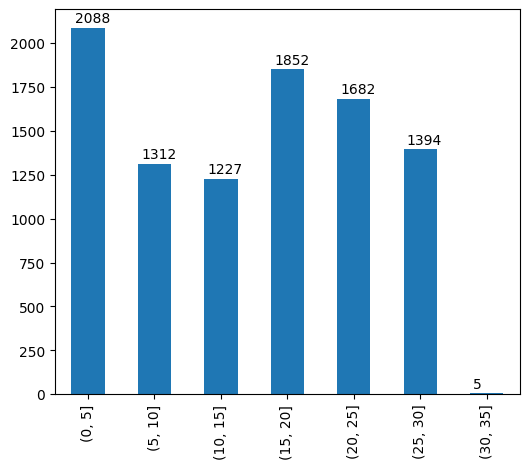

In [86]:
group_count = celeb_identity_new.groupby(["identity"], as_index=False)["image"].count()
interval_cut = pd.cut(group_count["image"], bins = np.arange(0, 40, 5)).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(6, 5))
(
    pd.cut(group_count["image"], bins = np.arange(0, 40, 5)).value_counts().sort_index().plot.bar(ax=ax)
)
for index, value in enumerate(interval_cut):
    ax.text(index-0.2, value+30, str(value))
plt.show()

In [93]:
# Count of identities that have less than 5 images present
np.count_nonzero(group_count["image"] <= 5)

2088

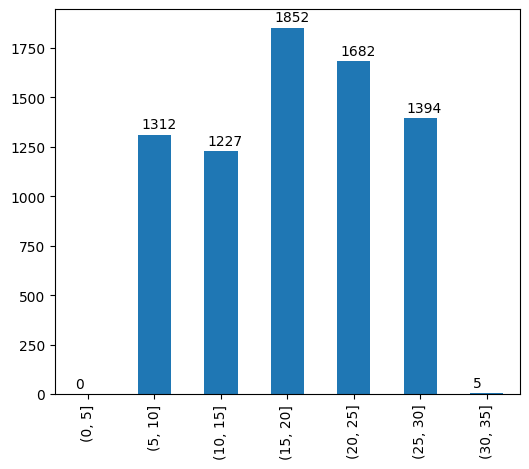

In [97]:
# Dropping identites with less than 5 images present
group_count_multiple_photos = group_count.drop(np.where(group_count["image"] <= 5)[0])
interval_cut = pd.cut(group_count_multiple_photos["image"], bins = np.arange(0, 40, 5)).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(6, 5))
(
    pd.cut(group_count_multiple_photos["image"], bins = np.arange(0, 40, 5)).value_counts().sort_index().plot.bar(ax=ax)
)
for index, value in enumerate(interval_cut):
    ax.text(index-0.2, value+30, str(value))
plt.show()

In [132]:
# Dropping newly dropped identites from the attribute data set
celeb_identity_multiple_photos = celeb_identity_new[celeb_identity_new["identity"].isin(group_count_multiple_photos["identity"])]
celeb_attrs_no_bottomfeeders_new = celeb_attrs_without_bottomfeeders[celeb_attrs_without_bottomfeeders["image"].isin(celeb_identity_multiple_photos["image"])]
celeb_attrs_no_bottomfeeders_new

,index,image,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Receding_Hairline,Rosy_Cheeks,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,...,-1,-1,1,1,-1,1,1,-1,-1,1
1,1,000002.jpg,-1,-1,-1,1,-1,-1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
2,3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,1,1,1,-1,1
3,4,000005.jpg,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
4,5,000006.jpg,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143459,202592,202593.jpg,-1,-1,1,-1,1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,1,-1,-1,1
143460,202593,202594.jpg,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,1,1,-1,-1,1
143461,202594,202595.jpg,-1,-1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
143462,202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1


In [133]:
# Testing attributes after changes
celeb_attrs_count_new = celeb_attrs_no_bottomfeeders_new.drop(columns=["image","index"]).apply(lambda x: x.value_counts())
celeb_attrs_count_new = celeb_attrs_count_new.transpose()
celeb_attrs_count_new["percentage"] = celeb_attrs_count_new[1].apply(lambda x: (x/celeb_rowcount)*100)
celeb_attrs_count_new

,-1,1,percentage
5_o_Clock_Shadow,126169,11753,5.801115
Arched_Eyebrows,92534,45388,22.402875
Attractive,50250,87672,43.273659
Bags_Under_Eyes,115625,22297,11.005484
Bangs,112728,25194,12.435402
Big_Lips,102840,35082,17.315979
Big_Nose,116456,21466,10.595314
Black_Hair,102993,34929,17.240460
Blond_Hair,112815,25107,12.392460
Brown_Hair,103163,34759,17.156551


In [134]:
celeb_attrs_count_new.index = celeb_attrs_count_new.index.set_names(['attrs'])
celeb_attrs_count_new.reset_index(inplace=True)
celeb_attrs_count_new

,attrs,-1,1,percentage
0,5_o_Clock_Shadow,126169,11753,5.801115
1,Arched_Eyebrows,92534,45388,22.402875
2,Attractive,50250,87672,43.273659
3,Bags_Under_Eyes,115625,22297,11.005484
4,Bangs,112728,25194,12.435402
5,Big_Lips,102840,35082,17.315979
6,Big_Nose,116456,21466,10.595314
7,Black_Hair,102993,34929,17.240460
8,Blond_Hair,112815,25107,12.392460
9,Brown_Hair,103163,34759,17.156551


In [144]:
# dropping attributes we will not be balancing around
attrs_no_irrelevant = celeb_attrs_count_new.drop(np.where(celeb_attrs_count_new["percentage"] < 10.0)[0])
attrs_no_irrelevant.loc[len(attrs_no_irrelevant.index)] = ["image",0,0,0]
celeb_attrs_no_irrelevant = celeb_attrs_no_bottomfeeders_new.drop(celeb_attrs_no_bottomfeeders_new.columns.difference(attrs_no_irrelevant["attrs"]), 1)
celeb_attrs_no_irrelevant.to_csv("../../Dataset/celeb_attrs_processed.txt", index=False)

C:\Users\adria\AppData\Local\Temp\ipykernel_10376\3805895003.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  celeb_attrs_no_irrelevant = celeb_attrs_no_bottomfeeders_new.drop(celeb_attrs_no_bottomfeeders_new.columns.difference(attrs_no_irrelevant["attrs"]), 1)


In [145]:
celeb_identity_export = celeb_identity_new[celeb_identity_new["image"].isin(celeb_attrs_no_irrelevant["image"])]
celeb_identity_export.to_csv("../../Dataset/celeb_identity_processed.txt", index=False)